# PROBLEM 1


train lr=0.1
epoch   500 | loss 2.120446 | lr 0.1
epoch  1000 | loss 2.115696 | lr 0.1
epoch  1500 | loss 2.111789 | lr 0.1
epoch  2000 | loss 2.108491 | lr 0.1
epoch  2500 | loss 2.105710 | lr 0.1
epoch  3000 | loss 2.103365 | lr 0.1
epoch  3500 | loss 2.101385 | lr 0.1
epoch  4000 | loss 2.099717 | lr 0.1
epoch  4500 | loss 2.098307 | lr 0.1
epoch  5000 | loss 2.097121 | lr 0.1

train lr=0.01
epoch   500 | loss 16.343971 | lr 0.01
epoch  1000 | loss 6.051247 | lr 0.01
epoch  1500 | loss 3.212580 | lr 0.01
epoch  2000 | loss 2.429323 | lr 0.01
epoch  2500 | loss 2.212852 | lr 0.01
epoch  3000 | loss 2.152676 | lr 0.01
epoch  3500 | loss 2.135606 | lr 0.01
epoch  4000 | loss 2.130429 | lr 0.01
epoch  4500 | loss 2.128541 | lr 0.01
epoch  5000 | loss 2.127568 | lr 0.01

train lr=0.001
epoch   500 | loss 53.686478 | lr 0.001
epoch  1000 | loss 42.391754 | lr 0.001
epoch  1500 | loss 37.331753 | lr 0.001
epoch  2000 | loss 33.069950 | lr 0.001
epoch  2500 | loss 29.330177 | lr 0.001
epoc

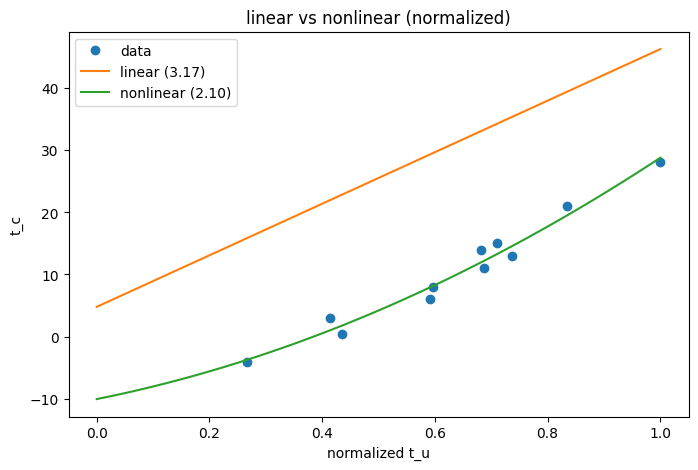

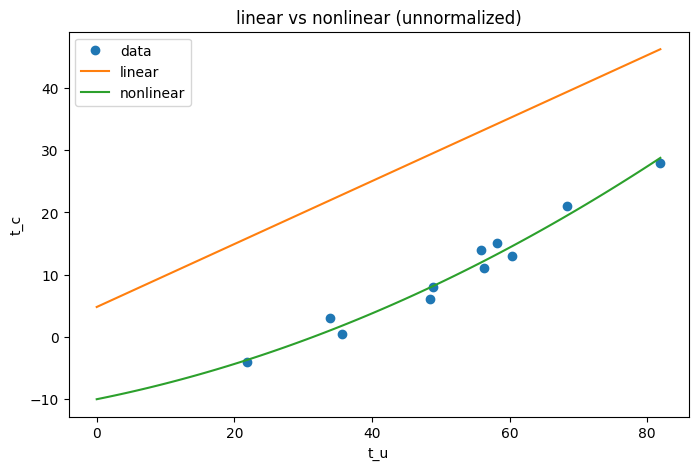

In [12]:
import torch
import matplotlib.pyplot as plt

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# normalize
t_u_norm = t_u / t_u.max()

# model
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

# loss
def loss_fn(t_p, t_c):
    return torch.mean((t_p - t_c)**2)

# train loop
def training_loop(n_epochs, lr, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            for p in params:
                p -= lr * p.grad
        for p in params:
            p.grad.zero_()
        if epoch % 500 == 0:
            print(f"epoch {epoch:5d} | loss {loss.item():.6f} | lr {lr}")
    return params

# train nonlinear
learning_rates = [0.1, 0.01, 0.001, 0.0001]
trained_params = {}

for lr in learning_rates:
    print(f"\ntrain lr={lr}")
    w1 = torch.randn(1, requires_grad=True)
    w2 = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    trained_params[lr] = training_loop(5000, lr, (w1, w2, b), t_u_norm, t_c)

# linear baseline
def linear_model(t_u, w, b):
    return w * t_u + b

def linear_training_loop(n_epochs, lr, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
            w.grad.zero_()
            b.grad.zero_()
    return (w, b, loss.item())

print("\ntrain linear baseline")
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
w, b, linear_loss = linear_training_loop(5000, 0.01, (w, b), t_u_norm, t_c)
print(f"linear loss {linear_loss:.6f}")

# eval nonlinear
nonlinear_losses = {}
for lr, (w1, w2, b) in trained_params.items():
    final_loss = loss_fn(model(t_u_norm, w1, w2, b), t_c).item()
    nonlinear_losses[lr] = final_loss
    print(f"nonlinear lr={lr} | loss {final_loss:.6f}")

best_lr = min(nonlinear_losses, key=nonlinear_losses.get)
best_params = trained_params[best_lr]
w1_best, w2_best, b_best = best_params
print(f"\nbest nonlinear lr={best_lr} | loss {nonlinear_losses[best_lr]:.6f}")

# plot
t_range = torch.linspace(0, 1, 100)
t_c_linear = linear_model(t_range, w, b)
t_c_nonlinear = model(t_range, w1_best, w2_best, b_best)

plt.figure(figsize=(8,5))
plt.plot(t_u_norm.detach(), t_c.detach(), 'o', label='data')
plt.plot(t_range.detach(), t_c_linear.detach(), '-', label=f'linear ({linear_loss:.2f})')
plt.plot(t_range.detach(), t_c_nonlinear.detach(), '-', label=f'nonlinear ({nonlinear_losses[best_lr]:.2f})')
plt.xlabel('normalized t_u')
plt.ylabel('t_c')
plt.legend()
plt.title('linear vs nonlinear (normalized)')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(t_u, t_c, 'o', label='data')
plt.plot(t_range * t_u.max(), t_c_linear.detach(), '-', label='linear')
plt.plot(t_range * t_u.max(), t_c_nonlinear.detach(), '-', label='nonlinear')
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.legend()
plt.title('linear vs nonlinear (unnormalized)')
plt.show()


# PROBLEM 2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



train lr=0.1
epoch   500 | train 0.437832 | val 0.743571 | lr 0.1
epoch  1000 | train 0.437832 | val 0.743571 | lr 0.1
epoch  1500 | train 0.437832 | val 0.743571 | lr 0.1
epoch  2000 | train 0.437832 | val 0.743571 | lr 0.1
epoch  2500 | train 0.437832 | val 0.743571 | lr 0.1
epoch  3000 | train 0.437832 | val 0.743571 | lr 0.1
epoch  3500 | train 0.437832 | val 0.743571 | lr 0.1
epoch  4000 | train 0.437832 | val 0.743571 | lr 0.1
epoch  4500 | train 0.437832 | val 0.743571 | lr 0.1
epoch  5000 | train 0.437832 | val 0.743571 | lr 0.1

train lr=0.01
epoch   500 | train 0.437841 | val 0.742912 | lr 0.01
epoch  1000 | train 0.437832 | val 0.743570 | lr 0.01
epoch  1500 | train 0.437832 | val 0.743571 | lr 0.01
epoch  2000 | train 0.437832 | val 0.743571 | lr 0.01
epoch  2500 | train 0.437832 | val 0.743571 | lr 0.01
epoch  3000 | train 0.437832 | val 0.743571 | lr 0.01
epoch  3500 | train 0.437832 | val 0.743571 | lr 0.01
epoch  4000 | train 0.437832 | val 0.743571 | lr 0.01
epoch  45

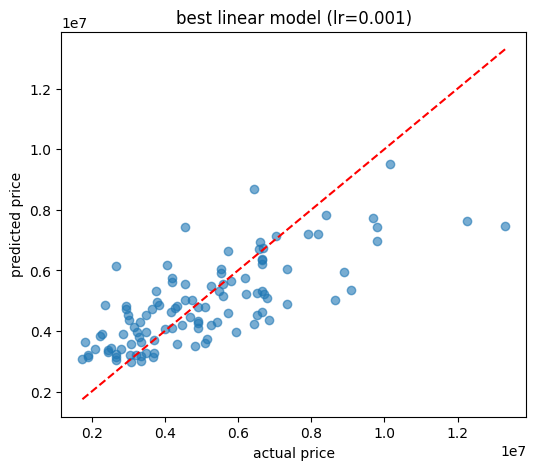

In [13]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)
display(df.head())

# encode labels
label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea', 'furnishingstatus']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features].values
y = df['price'].values.reshape(-1, 1)

# split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)

# tensors
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_t = torch.tensor(y_val_scaled, dtype=torch.float32)

# model
def model(X, W, b):
    return X @ W + b

# loss
def loss_fn(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

# train loop
def training_loop(n_epochs, lr, params, X_train, y_train, X_val, y_val):
    W, b = params
    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train, W, b)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        with torch.no_grad():
            W -= lr * W.grad
            b -= lr * b.grad
            W.grad.zero_()
            b.grad.zero_()
        with torch.no_grad():
            val_pred = model(X_val, W, b)
            val_loss = loss_fn(val_pred, y_val)
        if epoch % 500 == 0:
            print(f"epoch {epoch:5d} | train {loss.item():.6f} | val {val_loss.item():.6f} | lr {lr}")
    return (W, b, val_loss.item())

# train models
learning_rates = [0.1, 0.01, 0.001, 0.0001]
trained_models = {}

for lr in learning_rates:
    print(f"\ntrain lr={lr}")
    torch.manual_seed(0)
    W = torch.randn((X_train_t.shape[1], 1), requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    trained_models[lr] = training_loop(5000, lr, (W, b), X_train_t, y_train_t, X_val_t, y_val_t)

# final losses
print("\nfinal val losses")
for lr, (_, _, val_loss) in trained_models.items():
    print(f"lr={lr} | val {val_loss:.6f}")

# best model
best_lr = min(trained_models, key=lambda lr: trained_models[lr][2])
W_best, b_best, best_val_loss = trained_models[best_lr]
print(f"\nbest lr={best_lr} | val {best_val_loss:.6f}")

# plot
with torch.no_grad():
    y_pred_best = model(X_val_t, W_best, b_best)
    y_pred_best_unscaled = scaler_y.inverse_transform(y_pred_best.numpy())
    y_val_unscaled = scaler_y.inverse_transform(y_val_t.numpy())

plt.figure(figsize=(6,5))
plt.scatter(y_val_unscaled, y_pred_best_unscaled, alpha=0.6)
plt.plot([y_val_unscaled.min(), y_val_unscaled.max()],
         [y_val_unscaled.min(), y_val_unscaled.max()], 'r--')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title(f'best linear model (lr={best_lr})')
plt.show()

# PROBLEM 3

In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)

label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea', 'furnishingstatus']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# split
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features].values
y = df['price'].values.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)

# tensors
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_t = torch.tensor(y_val_scaled, dtype=torch.float32)

# train fn
def train_model(model, X_train, y_train, X_val, y_val, lr=0.01, epochs=200):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    start_time = time.time()

    for epoch in range(1, epochs + 1):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)

        ss_res = torch.sum((y_val - val_pred)**2)
        ss_tot = torch.sum((y_val - torch.mean(y_val))**2)
        r2 = 1 - ss_res / ss_tot

        if epoch % 50 == 0:
            print(f"epoch {epoch:4d} | train loss: {loss.item():.6f} | val loss: {val_loss.item():.6f} | r²: {r2.item():.4f}")

    training_time = time.time() - start_time
    return training_time, loss.item(), val_loss.item(), r2.item()

# model 1
class NN_1Hidden(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

print("\nmodel 1: one hidden layer")
model_1 = NN_1Hidden(X_train_t.shape[1])
time_1, train_loss_1, val_loss_1, r2_1 = train_model(model_1, X_train_t, y_train_t, X_val_t, y_val_t, lr=0.01, epochs=200)
print(f"\ntrain time: {time_1:.2f}s | final train loss: {train_loss_1:.6f} | final val loss: {val_loss_1:.6f} | r²: {r2_1:.4f}")

# model 2
class NN_3Hidden(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

print("\nmodel 2: three hidden layers")
model_3 = NN_3Hidden(X_train_t.shape[1])
time_3, train_loss_3, val_loss_3, r2_3 = train_model(model_3, X_train_t, y_train_t, X_val_t, y_val_t, lr=0.01, epochs=200)
print(f"\ntrain time: {time_3:.2f}s | final train loss: {train_loss_3:.6f} | final val loss: {val_loss_3:.6f} | r²: {r2_3:.4f}")



model 1: one hidden layer
epoch   50 | train loss: 0.435060 | val loss: 0.742274 | r²: 0.5472
epoch  100 | train loss: 0.405583 | val loss: 0.728838 | r²: 0.5554
epoch  150 | train loss: 0.389180 | val loss: 0.722686 | r²: 0.5591
epoch  200 | train loss: 0.383396 | val loss: 0.712300 | r²: 0.5655

train time: 0.22s | final train loss: 0.383396 | final val loss: 0.712300 | r²: 0.5655

model 2: three hidden layers
epoch   50 | train loss: 0.407136 | val loss: 0.715242 | r²: 0.5637
epoch  100 | train loss: 0.362709 | val loss: 0.751847 | r²: 0.5414
epoch  150 | train loss: 0.342107 | val loss: 0.783439 | r²: 0.5221
epoch  200 | train loss: 0.321297 | val loss: 0.808573 | r²: 0.5068

train time: 0.35s | final train loss: 0.321297 | final val loss: 0.808573 | r²: 0.5068
